In [101]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
!git clone https://github.com/pjreddie/darknet.git
!cd darknet/

In [0]:
!make

In [0]:
!imtest data/eagle.jpg

In [0]:
!ls

In [0]:
!git clone https://github.com/thtrieu/darkflow.git

In [0]:
!cd darkflow

In [0]:
!python setup.py build_ext --inplace

In [0]:
!pip install -e .


In [0]:
!pip install .

In [0]:
!wget https://pjreddie.com/media/files/yolov2.weights

In [0]:
!python flow --model cfg/yolo.cfg --load bin/yolov2.weights --demo 2015_05_08_08_27_20BackColor.avi --gpu 1.0 --saveVideo

In [0]:
from darkflow.net.build import TFNet
import cv2
import matplotlib.pyplot as plt


options = {"model": "cfg/yolo.cfg", "load": "bin/yolov2.weights", "threshold": 0.5, 'gpu':7}

tfnet = TFNet(options)

imgcv = cv2.imread("f2.jpg")
result = tfnet.return_predict(imgcv)
print(result)

In [0]:
def bounding_box(imgcv, result):  
  img = imgcv.copy()
  for res in result:
    tl = (res['topleft']['x'],res['topleft']['y'])
    br = (res['bottomright']['x'],res['bottomright']['y'])
    img = cv2.rectangle(img,tl,br,(0,255,0),2)
    img = cv2.putText(img,res['label'],tl, cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1)
    print(res['confidence'])
    img = cv2.putText(img,str(round(100*res['confidence'],2)),(res['topleft']['x'],res['topleft']['y']+10), cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
    cv2.rectangle(imgcv,(_x1,_y1),(_x2,_y2),(0,255,0),cv2.FILLED)
    cv2.putText(imgcv,label,(x1,y1),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
  return img

In [0]:
def bounbox(imgcv, box):
  for box in result:
    if(box['label']=='person'):
      x1,y1,x2,y2 = box['topleft']['x'],box['topleft']['y'],box['bottomright']['x'],box['bottomright']['y']
      conf = box['confidence']
      # print(conf)
      label = box['label']
      # print(x1,y1,x2,y2,conf,label)
      cv2.rectangle(imgcv,(x1,y1),(x2,y2),(0,255,0),2)
      labelSize=cv2.getTextSize(label,cv2.FONT_HERSHEY_COMPLEX,0.5,1)
      # print('labelSize>>',labelSize)
      _x1 = x1
      _y1 = y1#+int(labelSize[0][1]/2)
      _x2 = _x1+labelSize[0][0]
      _y2 = y1-int(labelSize[0][1])
      cv2.rectangle(imgcv,(_x1,_y1),(_x2,_y2),(0,255,0),cv2.FILLED)
      cv2.putText(imgcv,label,(x1,y1),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
  return imgcv

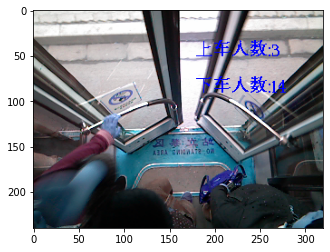

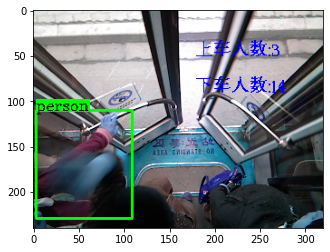

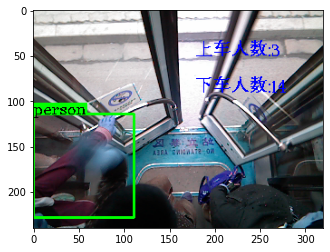

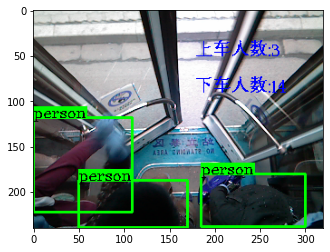

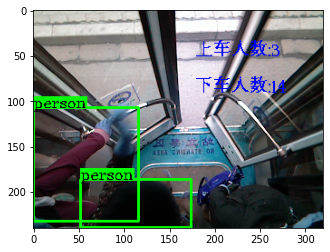

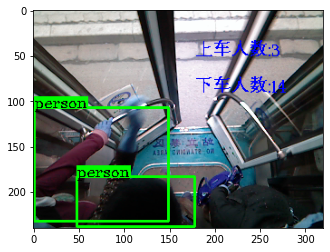

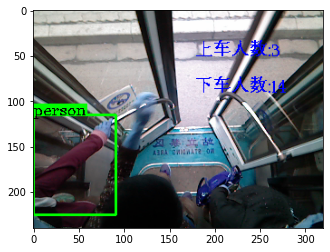

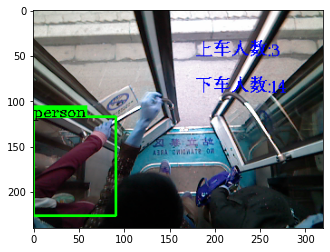

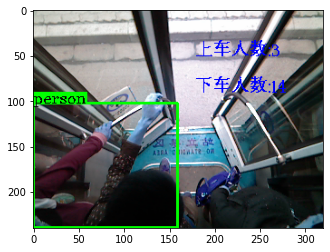

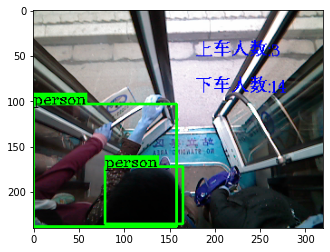

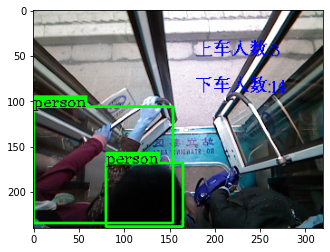

In [163]:
capture = cv2.VideoCapture('2015_05_08_08_27_20BackColor.avi')
# capture = cv2.VideoCapture('people-capture.mp4')

ret, frame = capture.read()
frame_height,frame_width,_ = frame.shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('people.avi',fourcc, 30, (frame_width,frame_height))

ret = True
count = 0
while(ret):
  ret, frame = capture.read()
  if(ret):
    result = tfnet.return_predict(frame)
    if(len(result)>0):
      frame = bounbox(frame,result)
    out.write(frame)
    plt.imshow(frame)
    plt.show()
    count+=1

  if(count>10):
    ret = False

capture.release()
out.release()

In [155]:
frame.shape

(240, 320, 3)